# Negative Interest's Effect on Nation as Interpreted Using  Synthetic Control Method

## Data Header & Discription:

In [4]:
import pandas as pd
import numpy as np
from SyntheticControlMethods import Synth, DiffSynth

data = pd.read_csv("data.csv")
display(data.head())
display(data.describe())

,Country,Year,GDP,Inflation,Industry,Investment,Trade,Education
0,Australia,1970,4638.888936,3.439153,NaN,NaN,26.191962,NaN
1,Australia,1971,4849.919426,6.138107,NaN,NaN,25.591606,NaN
2,Australia,1972,5195.435143,6.024096,NaN,0.438360,24.793184,NaN
3,Australia,1973,5779.516501,9.090909,NaN,0.389973,25.169357,NaN
4,Australia,1974,6228.471482,15.416667,NaN,0.408150,26.362158,NaN


,Year,GDP,Inflation,Industry,Investment,Trade,Education
count,1000.000000,1000.000000,1000.000000,716.000000,815.000000,998.000000,248.000000
mean,1994.500000,23461.485160,5.071585,26.186510,1.358166,68.571005,60.142711
std,14.438091,15718.098407,5.292611,5.132375,0.856590,33.237217,19.201752
min,1970.000000,600.311053,-4.478103,13.682270,-0.556806,16.013879,6.242010
25%,1982.000000,10319.140690,1.652940,22.299823,0.851023,47.252477,47.718287
50%,1994.500000,20520.209361,2.971363,25.959917,1.223711,60.791878,66.357460
75%,2007.000000,34124.519693,6.970550,29.493962,1.682349,82.195682,75.128862
max,2019.000000,89561.458769,31.016749,40.294811,5.822646,239.215092,87.735657


## Difference Synthetic Control Results:

Denmark Synthetic control:


,Unit,Weight
0,Australia,0.095760
2,Belgium,0.597632
13,Norway,0.149473
18,United Kingdom,0.157133


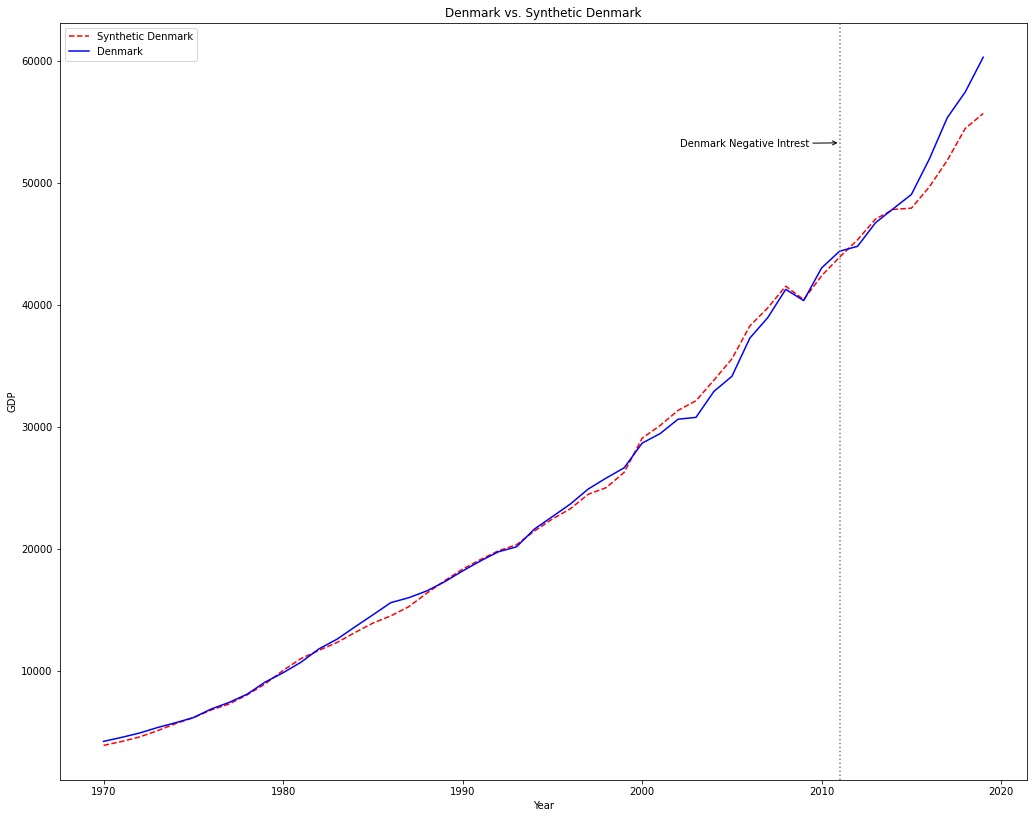

None

Switzerland Synthetic control:


,Unit,Weight
0,Australia,0.330657
9,Italy,0.395570
14,Norway,0.273773


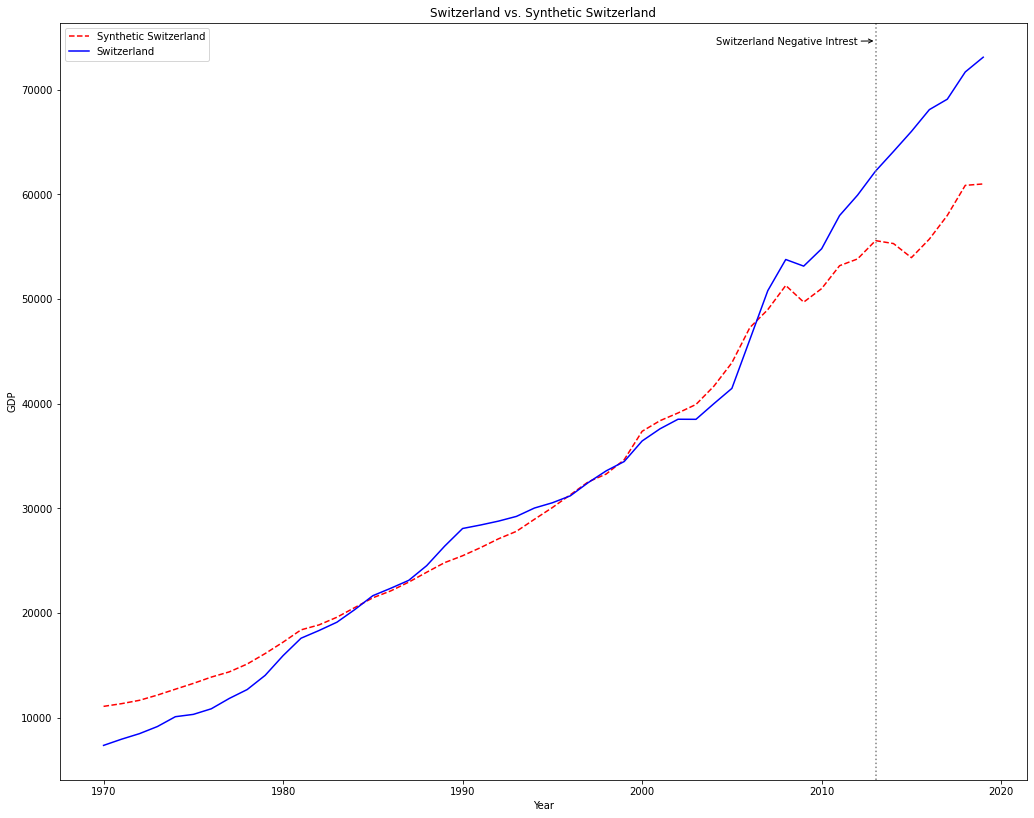

None

In [3]:
treated_year = {'Denmark': 2012, 'Switzerland': 2014}
DSC = {}

for country in treated_year:
    #def __init__(data, outcome_var, unit_var, time_var, treatment_period, treated_unit, n_optim)
    DSC[country] = DiffSynth(data, "GDP", "Country", "Year", treated_year[country], 
                            country, 10000, pen='auto')
    print("{} Synthetic control:".format(country))
    display(DSC[country].original_data.weight_df)
    display(DSC[country].plot(["original"], treated_label=country,
                             synth_label="Synthetic {}".format(country), 
                             treatment_label="{} Negative Intrest".format(country)))

## Fit Comparison for Difference Synthetic Control:

In [13]:
for country in DSC:
    display(DSC[country].original_data.comparison_df)

,Denmark,Synthetic Denmark,WMAPE,Importance
GDP,979.751350,975.958035,1323.921783,0.214157
Inflation,4.943661,4.684725,0.873887,0.156701
Industry,22.719843,26.211936,1.985786,0.034260
Investment,1.081020,0.696946,0.626522,0.186345
Trade,72.859584,94.323344,35.293019,0.255022
Education,64.863362,51.972943,15.211879,0.228704


,Switzerland,Synthetic Switzerland,WMAPE,Importance
GDP,1276.105148,1034.995292,7196.075633,0.218743
Inflation,2.599877,6.001977,3.379296,0.493695
Industry,28.878157,27.985588,2.877877,0.141473
Investment,0.642467,1.021940,0.516482,0.039485
Trade,92.301503,48.504696,43.791831,0.032658
Education,55.480442,49.086126,13.795284,0.078789


## Synthetic Control Results:

Sweden Synthetic control:


,Unit,Weight
17,Switzerland,0.300788
18,United Kingdom,0.699173


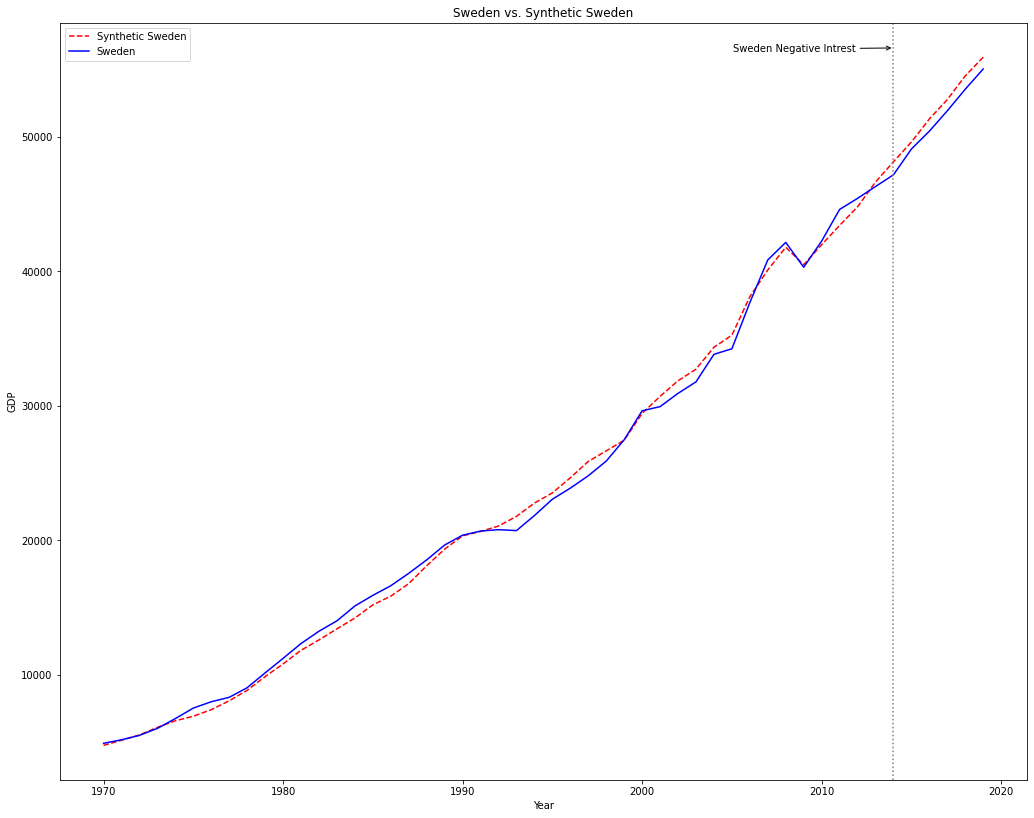

None

Japan Synthetic control:


,Unit,Weight
0,Australia,0.135764
9,Italy,0.864581


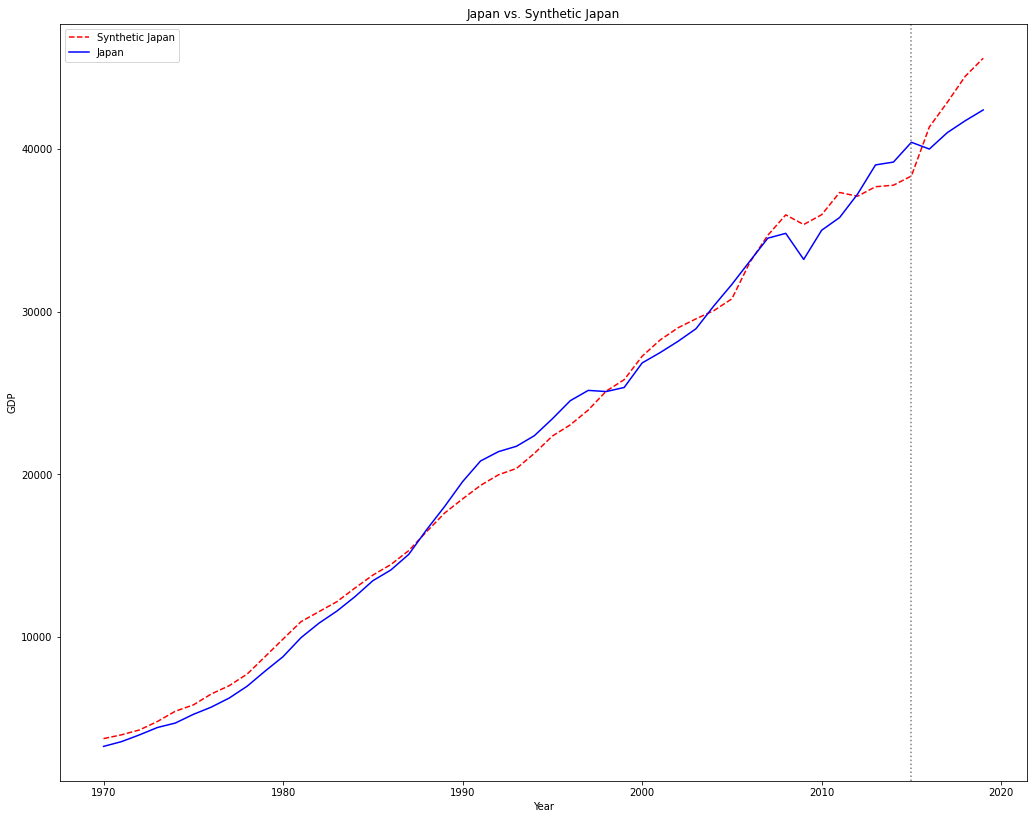

None

In [6]:
treated_year = {'Sweden': 2015, 'Japan': 2016}
SC = {}

for country in treated_year:
    #def __init__(data, outcome_var, unit_var, time_var, treatment_period, treated_unit, n_optim)
    SC[country] = Synth(data, "GDP", "Country", "Year", treated_year[country], country, 10000)
    print("{} Synthetic control:".format(country))
    display(SC[country].original_data.weight_df)
    display(SC[country].plot(["original"], treated_label=country,
            synth_label="Synthetic {}".format(country), treatment_label="{} Negative Intrest".format(country)))

## Fit Comparison for Synthetic Control:

In [12]:
for country in SC:
    display(SC[country].original_data.comparison_df)

,Sweden,Synthetic Sweden,WMAPE,Importance
GDP,22933.399532,22927.349331,4316.481933,0.253300
Inflation,4.834114,4.908948,1.440280,0.088215
Industry,26.080464,23.673343,2.997170,0.082357
Investment,1.618162,1.028363,0.589812,0.036664
Trade,66.219997,64.153475,17.978815,0.240597
Education,65.892079,79.402508,13.511438,0.299743


,Japan,Synthetic Japan,WMAPE,Importance
GDP,20610.517421,20676.244099,542.313644,0.136063
Inflation,2.780069,6.540076,3.759048,0.541876
Industry,30.529908,24.276615,6.263822,0.187934
Investment,1.157795,0.934055,0.224140,0.024227
Trade,23.507503,42.520707,19.005097,0.014091
Education,57.643711,45.695490,15.485583,0.095859


## In-Space Placebo Results:

/home/ofek/technion/causal_inference/project/py_37/lib/python3.7/site-packages/SyntheticControlMethods/plot.py:221: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


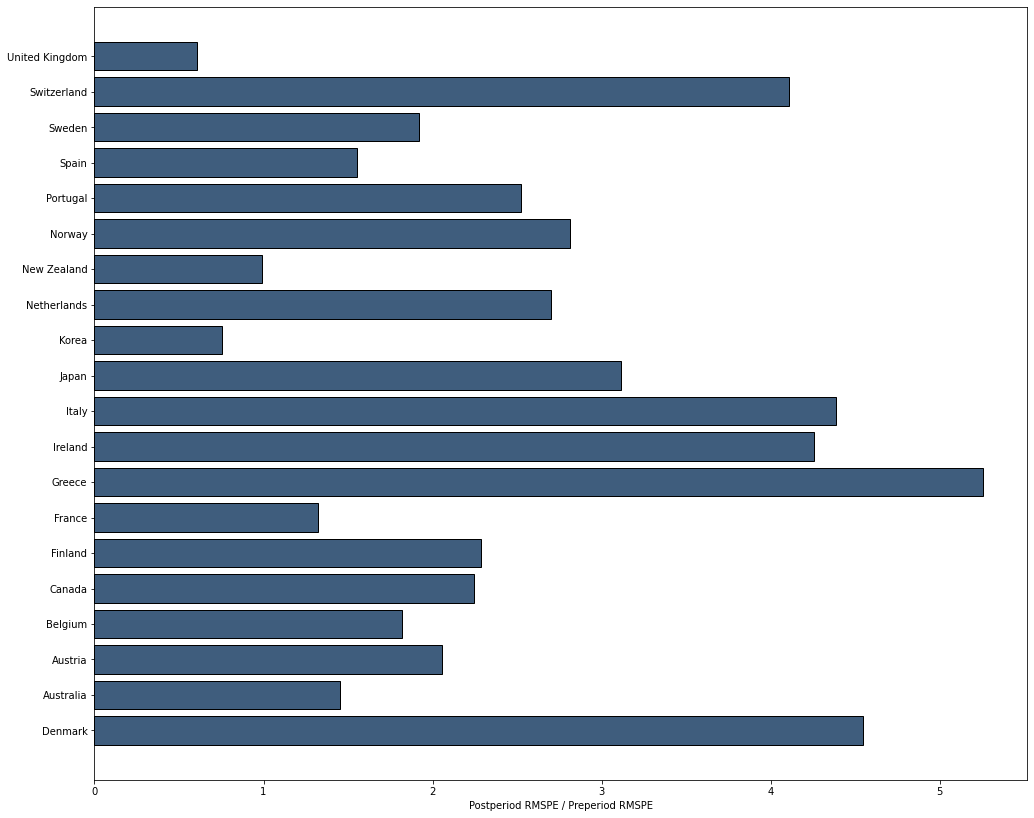

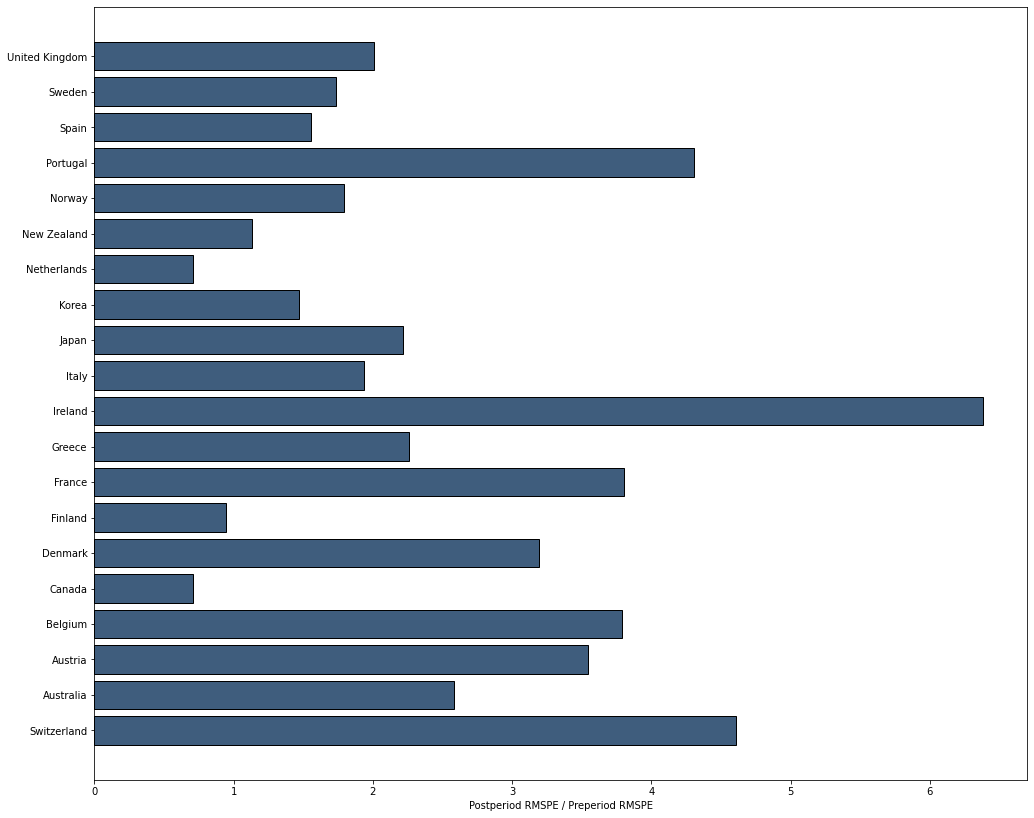

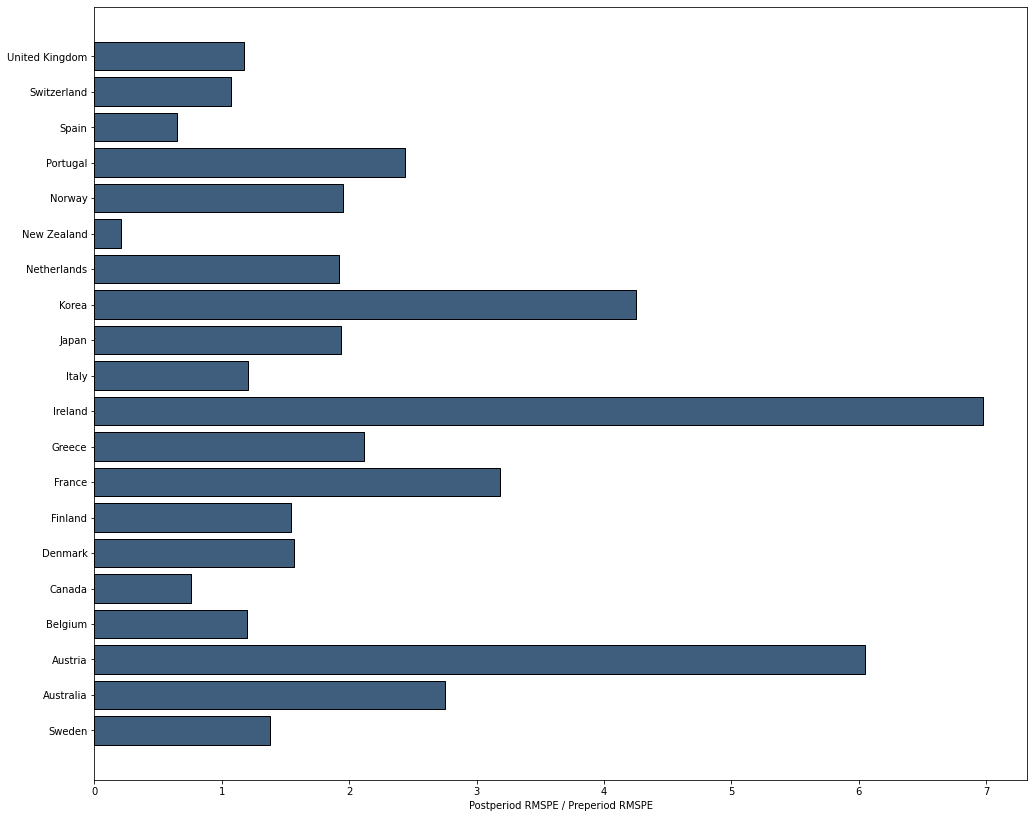

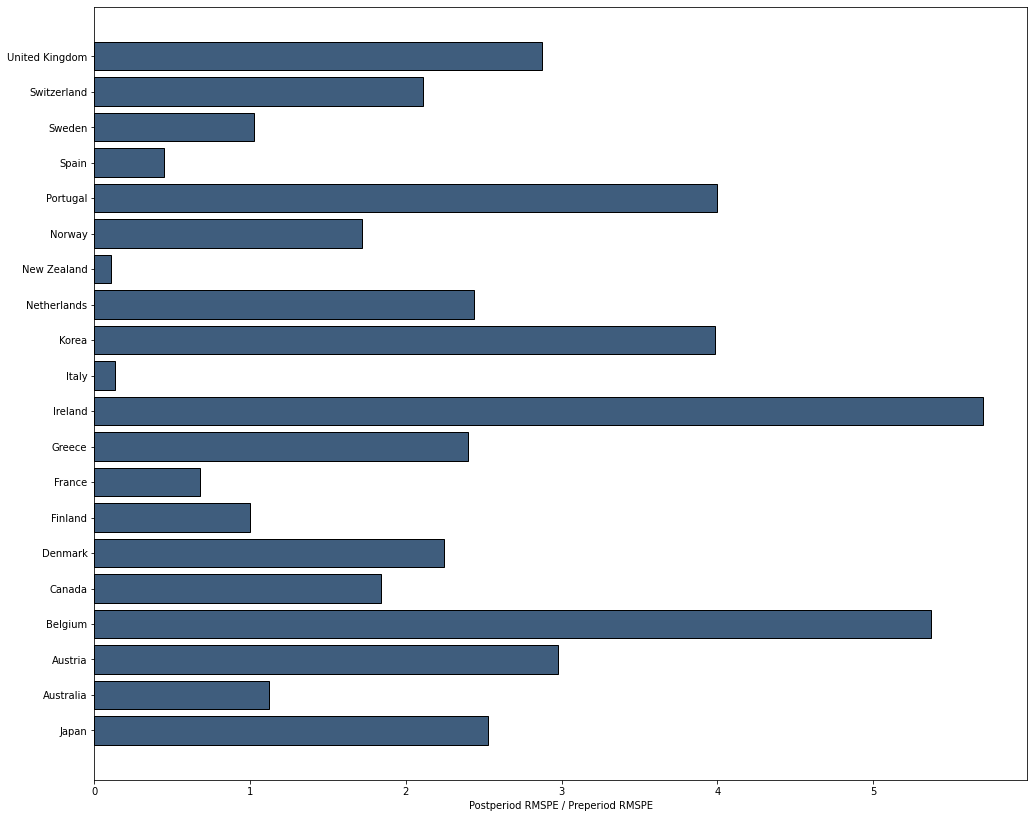

In [5]:
for country in DSC:
    #def __init__(data, outcome_var, unit_var, time_var, treatment_period, treated_unit, n_optim)
    DSC[country].in_space_placebo(n_optim=1000)
    DSC[country].plot(['rmspe ratio'], treated_label=country)
for country in SC:
    #def __init__(data, outcome_var, unit_var, time_var, treatment_period, treated_unit, n_optim)
    SC[country].in_space_placebo(n_optim=1000)
    SC[country].plot(['rmspe ratio'], treated_label=country)

## RMSPE Results:

In [15]:
for country in DSC:
    display(DSC[country].original_data.rmspe_df)
for country in SC:
    display(SC[country].original_data.rmspe_df)

,unit,pre_rmspe,post_rmspe,post/pre
0,Denmark,546.205820,2482.527571,4.545040
1,Australia,3588.973013,5209.990065,1.451666
2,Austria,3731.606667,7661.095616,2.053029
3,Belgium,2020.409675,3671.196786,1.817056
4,Canada,1757.743719,3948.143376,2.246143
5,Finland,6859.280365,15681.217639,2.286132
6,France,1095.213334,1445.936105,1.320232
7,Greece,1165.009857,6120.992994,5.254027
8,Ireland,4091.626853,17416.861678,4.256708
9,Italy,4406.615715,19322.852870,4.384964


,unit,pre_rmspe,post_rmspe,post/pre
0,Switzerland,2448.801126,11279.227086,4.606020
1,Australia,2838.472044,7324.939758,2.580593
2,Austria,5192.250735,18402.231275,3.544172
3,Belgium,4139.739777,15680.881303,3.787891
4,Canada,1236.773542,872.708053,0.705633
5,Denmark,2111.174250,6747.499873,3.196089
6,Finland,1331.452537,1260.397987,0.946634
7,France,665.429180,2531.655780,3.804546
8,Greece,11652.783342,26354.745578,2.261670
9,Ireland,4812.349119,30706.307169,6.380731


,unit,pre_rmspe,post_rmspe,post/pre
0,Sweden,615.59347,841.144544,1.366396


,unit,pre_rmspe,post_rmspe,post/pre
0,Japan,947.299675,2390.940603,2.523954


## In-Time Placebo Results:

Denmark Synthetic control:


,Unit,Weight
2,Belgium,0.534441
17,United States,0.465559


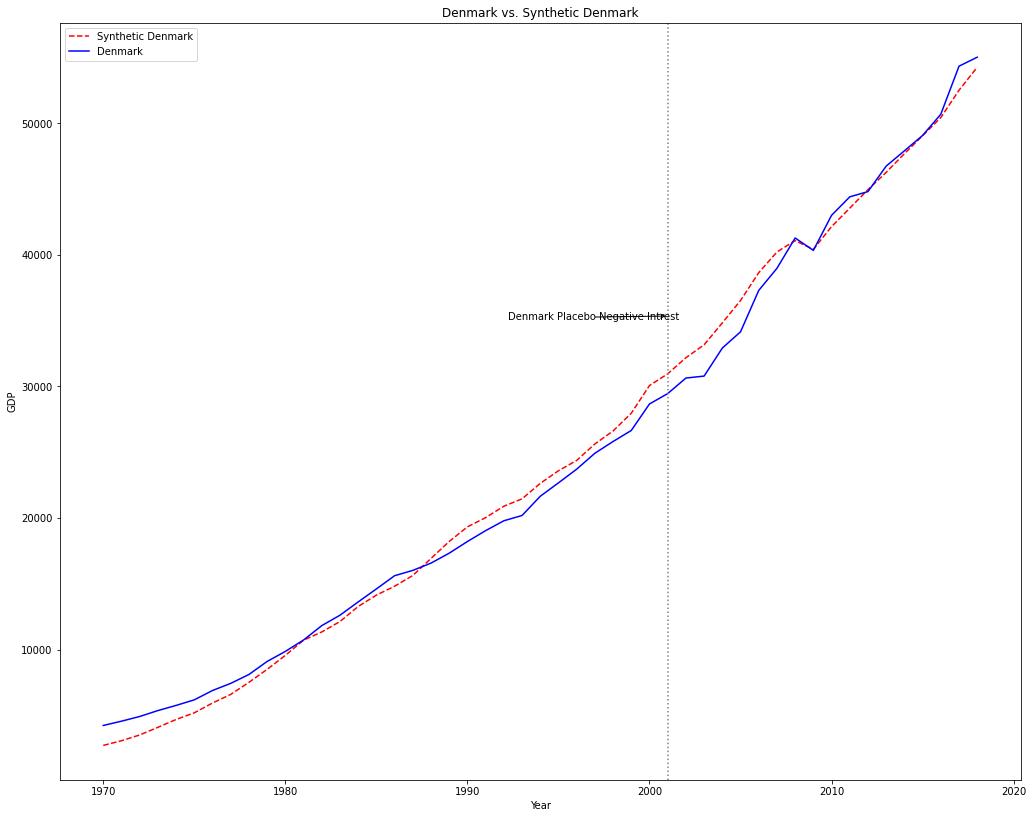

None

Switzerland Synthetic control:


,Unit,Weight
2,Belgium,0.520646
17,United States,0.479354


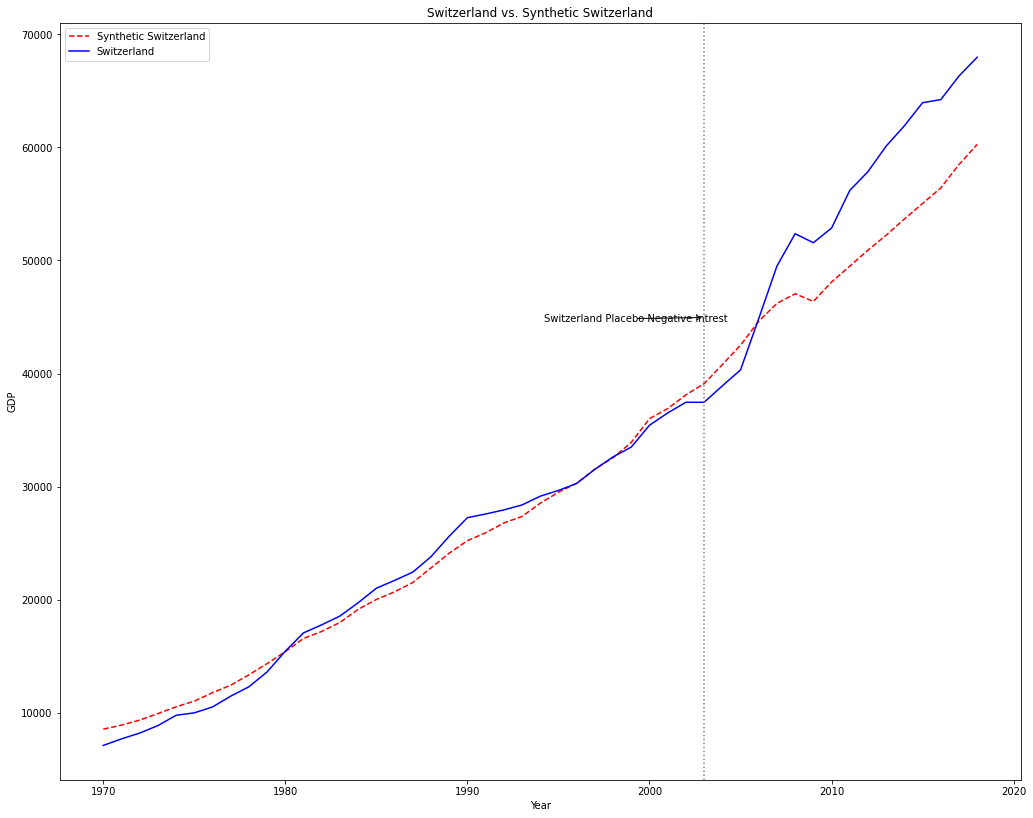

None

Sweden Synthetic control:


,Unit,Weight
2,Belgium,0.525407
9,Japan,0.011887
17,United States,0.462706


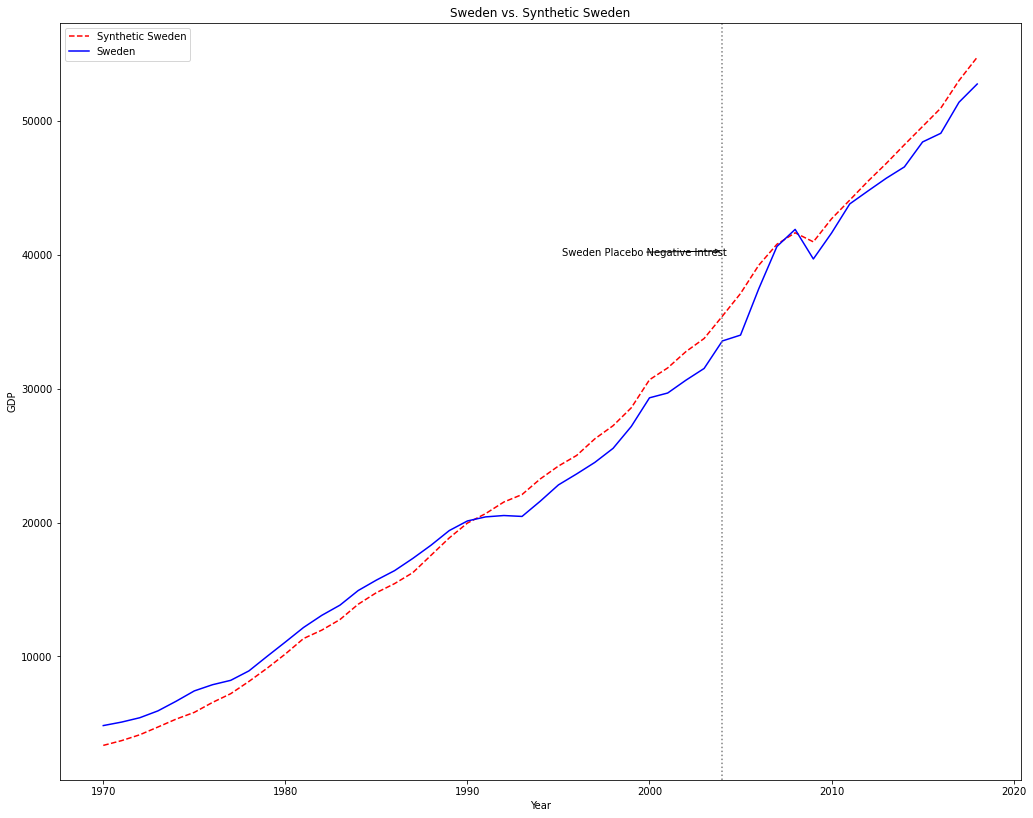

None

Japan Synthetic control:


,Unit,Weight
2,Belgium,0.476693
17,United States,0.523307


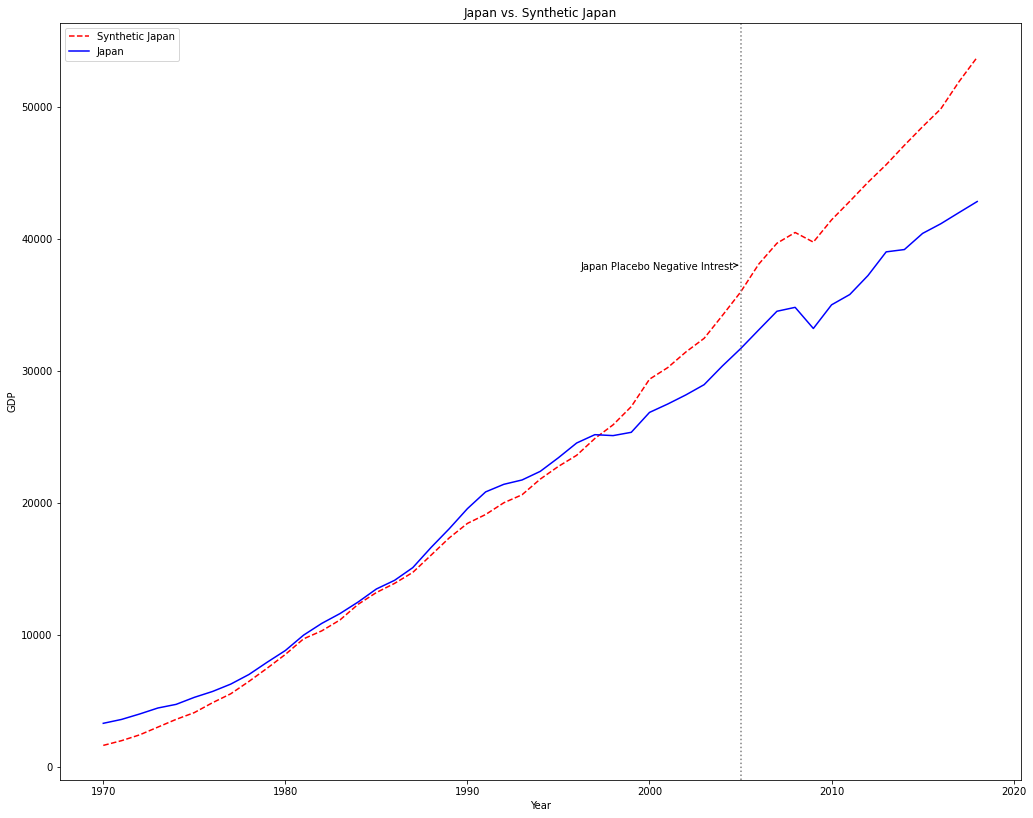

None

In [4]:
placebo_year = {'Denmark': 2002, 'Switzerland': 2004, 'Sweden': 2005, 'Japan': 2006}
DSC = {}

for country in placebo_year:
    #def __init__(data, outcome_var, unit_var, time_var, treatment_period, treated_unit, n_optim)
    DSC[country] = DiffSynth(data, "GDP", "Country", "Year", placebo_year[country], country, 10000, pen='auto')
    print("{} Synthetic control:".format(country))
    display(DSC[country].original_data.weight_df)
    display(DSC[country].plot(["original"], treated_label=country,
            synth_label="Synthetic {}".format(country), treatment_label="{} Placebo Negative Intrest".format(country)))